In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [2]:
data_directory = os.path.join(os.getcwd(), 'Rec System', 'spotify_million_playlist_dataset', 'data')
print("Full path to data directory:", data_directory)

Full path to data directory: /Users/ashtonberret/4243-Project/Rec System/Rec System/spotify_million_playlist_dataset/data


In [3]:
if os.path.exists(data_directory):
    print("Directory exists")
    print("Contents of directory:", os.listdir(data_directory))
else:
    print("Directory does not exist")

Directory does not exist


In [4]:
def find_directory(name, path):
    for root, dirs, files in os.walk(path):
        if name in dirs:
            return os.path.join(root, name)
    return None

search_result = find_directory('data', os.getcwd())
if search_result:
    print("Found data directory at:", search_result)
else:
    print("Could not find data directory")

Found data directory at: /Users/ashtonberret/4243-Project/Rec System/spotify_million_playlist_dataset/data


In [12]:
import json
from tqdm import tqdm

print("Current working directory:", os.getcwd())

def find_directory(name, path):
    for root, dirs, files in os.walk(path):
        if name in dirs:
            return os.path.join(root, name)
    return None

def process_playlist_files(directory, max_files=None):
    all_tracks = []
    
    # Get list of all JSON files in the directory
    json_files = [pos_json for pos_json in os.listdir(directory) if pos_json.endswith('.json')]
    
    # Limit the number of files if specified
    if max_files:
        json_files = json_files[:max_files]
    
    # Process each JSON file
    for file in tqdm(json_files, desc="Processing files"):
        with open(os.path.join(directory, file), 'r') as f:
            playlist_data = json.load(f)
            
        for playlist in playlist_data['playlists']:
            for track in playlist['tracks']:
                all_tracks.append({
                    'track_name': track['track_name'],
                    'artist_name': track['artist_name'],
                    'album_name': track['album_name'],
                    'duration_ms': track['duration_ms'],
                    'playlist_name': playlist['name']
                })
        
        # Print progress after each file
        print(f"Processed {file}. Total tracks so far: {len(all_tracks)}")
    
    # Convert to DataFrame
    return pd.DataFrame(all_tracks)

data_directory = "/Users/ashtonberret/4243-Project/Rec System/spotify_million_playlist_dataset/data"
max_files = 100 # Change this to process more or fewer files
data = process_playlist_files(data_directory, max_files=max_files)

Current working directory: /Users/ashtonberret/4243-Project/Rec System


Processing files:   2%|▏         | 2/100 [00:00<00:09, 10.56it/s]

Processed mpd.slice.549000-549999.json. Total tracks so far: 68689
Processed mpd.slice.613000-613999.json. Total tracks so far: 135954
Processed mpd.slice.115000-115999.json. Total tracks so far: 202895


Processing files:   4%|▍         | 4/100 [00:00<00:09, 10.54it/s]

Processed mpd.slice.778000-778999.json. Total tracks so far: 269009
Processed mpd.slice.290000-290999.json. Total tracks so far: 330710


Processing files:   6%|▌         | 6/100 [00:00<00:08, 10.96it/s]

Processed mpd.slice.596000-596999.json. Total tracks so far: 394387


Processing files:   8%|▊         | 8/100 [00:00<00:08, 10.87it/s]

Processed mpd.slice.324000-324999.json. Total tracks so far: 460927
Processed mpd.slice.422000-422999.json. Total tracks so far: 529450
Processed mpd.slice.974000-974999.json. Total tracks so far: 597361


Processing files:  10%|█         | 10/100 [00:00<00:08, 10.70it/s]

Processed mpd.slice.679000-679999.json. Total tracks so far: 666655
Processed mpd.slice.7000-7999.json. Total tracks so far: 734269


Processing files:  12%|█▏        | 12/100 [00:01<00:08, 10.44it/s]

Processed mpd.slice.391000-391999.json. Total tracks so far: 799958
Processed mpd.slice.497000-497999.json. Total tracks so far: 868188


Processing files:  14%|█▍        | 14/100 [00:01<00:09,  9.41it/s]

Processed mpd.slice.225000-225999.json. Total tracks so far: 935226


Processing files:  16%|█▌        | 16/100 [00:01<00:08,  9.64it/s]

Processed mpd.slice.523000-523999.json. Total tracks so far: 998998
Processed mpd.slice.875000-875999.json. Total tracks so far: 1064185
Processed mpd.slice.448000-448999.json. Total tracks so far: 1131175

Processing files:  18%|█▊        | 18/100 [00:01<00:08,  9.63it/s]


Processed mpd.slice.712000-712999.json. Total tracks so far: 1197493
Processed mpd.slice.193000-193999.json. Total tracks so far: 1264104


Processing files:  22%|██▏       | 22/100 [00:02<00:07,  9.93it/s]

Processed mpd.slice.38000-38999.json. Total tracks so far: 1327468
Processed mpd.slice.695000-695999.json. Total tracks so far: 1393698
Processed mpd.slice.899000-899999.json. Total tracks so far: 1460726


Processing files:  24%|██▍       | 24/100 [00:02<00:07,  9.99it/s]

Processed mpd.slice.721000-721999.json. Total tracks so far: 1525900
Processed mpd.slice.510000-510999.json. Total tracks so far: 1589450
Processed mpd.slice.846000-846999.json. Total tracks so far: 1655947


Processing files:  27%|██▋       | 27/100 [00:02<00:07,  9.63it/s]

Processed mpd.slice.216000-216999.json. Total tracks so far: 1722125
Processed mpd.slice.411000-411999.json. Total tracks so far: 1789474


Processing files:  28%|██▊       | 28/100 [00:02<00:07,  9.62it/s]

Processed mpd.slice.947000-947999.json. Total tracks so far: 1856576
Processed mpd.slice.317000-317999.json. Total tracks so far: 1922507
Processed mpd.slice.22000-22999.json. Total tracks so far: 1992450


Processing files:  32%|███▏      | 32/100 [00:03<00:07,  9.56it/s]

Processed mpd.slice.794000-794999.json. Total tracks so far: 2056860
Processed mpd.slice.126000-126999.json. Total tracks so far: 2126544


Processing files:  34%|███▍      | 34/100 [00:03<00:06,  9.64it/s]

Processed mpd.slice.998000-998999.json. Total tracks so far: 2193206
Processed mpd.slice.620000-620999.json. Total tracks so far: 2259469


Processing files:  36%|███▌      | 36/100 [00:03<00:06,  9.62it/s]

Processed mpd.slice.3000-3999.json. Total tracks so far: 2325981
Processed mpd.slice.70000-70999.json. Total tracks so far: 2390842


Processing files:  38%|███▊      | 38/100 [00:03<00:06,  9.37it/s]

Processed mpd.slice.597000-597999.json. Total tracks so far: 2457114
Processed mpd.slice.291000-291999.json. Total tracks so far: 2524636


Processing files:  40%|████      | 40/100 [00:04<00:06,  9.34it/s]

Processed mpd.slice.779000-779999.json. Total tracks so far: 2591687
Processed mpd.slice.423000-423999.json. Total tracks so far: 2657804


Processing files:  42%|████▏     | 42/100 [00:04<00:06,  9.44it/s]

Processed mpd.slice.975000-975999.json. Total tracks so far: 2727681
Processed mpd.slice.325000-325999.json. Total tracks so far: 2793428


Processing files:  44%|████▍     | 44/100 [00:04<00:07,  7.57it/s]

Processed mpd.slice.548000-548999.json. Total tracks so far: 2857584
Processed mpd.slice.114000-114999.json. Total tracks so far: 2924814
Processed mpd.slice.612000-612999.json. Total tracks so far: 2989550


Processing files:  47%|████▋     | 47/100 [00:04<00:06,  8.67it/s]

Processed mpd.slice.449000-449999.json. Total tracks so far: 3054304
Processed mpd.slice.713000-713999.json. Total tracks so far: 3121868


Processing files:  49%|████▉     | 49/100 [00:05<00:05,  8.99it/s]

Processed mpd.slice.496000-496999.json. Total tracks so far: 3188357
Processed mpd.slice.390000-390999.json. Total tracks so far: 3255455


Processing files:  51%|█████     | 51/100 [00:05<00:05,  9.21it/s]

Processed mpd.slice.678000-678999.json. Total tracks so far: 3323230
Processed mpd.slice.522000-522999.json. Total tracks so far: 3391466
Processed mpd.slice.874000-874999.json. Total tracks so far: 3453827


Processing files:  54%|█████▍    | 54/100 [00:05<00:04,  9.44it/s]

Processed mpd.slice.224000-224999.json. Total tracks so far: 3520872
Processed mpd.slice.81000-81999.json. Total tracks so far: 3585628


Processing files:  56%|█████▌    | 56/100 [00:05<00:04,  9.56it/s]

Processed mpd.slice.217000-217999.json. Total tracks so far: 3651932
Processed mpd.slice.511000-511999.json. Total tracks so far: 3716807
Processed mpd.slice.847000-847999.json. Total tracks so far: 3783576


Processing files:  58%|█████▊    | 58/100 [00:06<00:04,  9.74it/s]

Processed mpd.slice.694000-694999.json. Total tracks so far: 3848297
Processed mpd.slice.192000-192999.json. Total tracks so far: 3910907
Processed mpd.slice.720000-720999.json. Total tracks so far: 3977550


Processing files:  62%|██████▏   | 62/100 [00:06<00:03,  9.67it/s]

Processed mpd.slice.898000-898999.json. Total tracks so far: 4042240
Processed mpd.slice.54000-54999.json. Total tracks so far: 4108043


Processing files:  64%|██████▍   | 64/100 [00:06<00:03,  9.65it/s]

Processed mpd.slice.795000-795999.json. Total tracks so far: 4175075
Processed mpd.slice.621000-621999.json. Total tracks so far: 4242440
Processed mpd.slice.999000-999999.json. Total tracks so far: 4306490


Processing files:  66%|██████▌   | 66/100 [00:06<00:03,  9.71it/s]

Processed mpd.slice.127000-127999.json. Total tracks so far: 4372686
Processed mpd.slice.316000-316999.json. Total tracks so far: 4434757
Processed mpd.slice.410000-410999.json. Total tracks so far: 4502276


Processing files:  70%|███████   | 70/100 [00:07<00:03,  9.66it/s]

Processed mpd.slice.946000-946999.json. Total tracks so far: 4568713
Processed mpd.slice.227000-227999.json. Total tracks so far: 4636165


Processing files:  72%|███████▏  | 72/100 [00:07<00:03,  7.76it/s]

Processed mpd.slice.84000-84999.json. Total tracks so far: 4702733
Processed mpd.slice.877000-877999.json. Total tracks so far: 4769383


Processing files:  74%|███████▍  | 74/100 [00:07<00:03,  8.39it/s]

Processed mpd.slice.521000-521999.json. Total tracks so far: 4835672
Processed mpd.slice.393000-393999.json. Total tracks so far: 4899983


Processing files:  76%|███████▌  | 76/100 [00:08<00:02,  8.90it/s]

Processed mpd.slice.495000-495999.json. Total tracks so far: 4966869
Processed mpd.slice.710000-710999.json. Total tracks so far: 5030901


Processing files:  78%|███████▊  | 78/100 [00:08<00:02,  8.91it/s]

Processed mpd.slice.611000-611999.json. Total tracks so far: 5097223
Processed mpd.slice.117000-117999.json. Total tracks so far: 5164636


Processing files:  79%|███████▉  | 79/100 [00:08<00:02,  8.94it/s]

Processed mpd.slice.51000-51999.json. Total tracks so far: 5233755
Processed mpd.slice.326000-326999.json. Total tracks so far: 5298176
Processed mpd.slice.976000-976999.json. Total tracks so far: 5364455


Processing files:  83%|████████▎ | 83/100 [00:08<00:01,  9.46it/s]

Processed mpd.slice.420000-420999.json. Total tracks so far: 5430008
Processed mpd.slice.292000-292999.json. Total tracks so far: 5495106


Processing files:  85%|████████▌ | 85/100 [00:09<00:01,  9.45it/s]

Processed mpd.slice.594000-594999.json. Total tracks so far: 5563238
Processed mpd.slice.945000-945999.json. Total tracks so far: 5629161


Processing files:  87%|████████▋ | 87/100 [00:09<00:01,  9.42it/s]

Processed mpd.slice.413000-413999.json. Total tracks so far: 5694070
Processed mpd.slice.75000-75999.json. Total tracks so far: 5761731


Processing files:  89%|████████▉ | 89/100 [00:09<00:01,  9.52it/s]

Processed mpd.slice.315000-315999.json. Total tracks so far: 5827611
Processed mpd.slice.749000-749999.json. Total tracks so far: 5894081
Processed mpd.slice.124000-124999.json. Total tracks so far: 5961165


Processing files:  92%|█████████▏| 92/100 [00:09<00:00,  9.68it/s]

Processed mpd.slice.622000-622999.json. Total tracks so far: 6026754
Processed mpd.slice.578000-578999.json. Total tracks so far: 6089527
Processed mpd.slice.796000-796999.json. Total tracks so far: 6154842


Processing files:  95%|█████████▌| 95/100 [00:10<00:00,  9.56it/s]

Processed mpd.slice.723000-723999.json. Total tracks so far: 6222462
Processed mpd.slice.191000-191999.json. Total tracks so far: 6289043
Processed mpd.slice.479000-479999.json. Total tracks so far: 6351947


Processing files:  98%|█████████▊| 98/100 [00:10<00:00,  9.61it/s]

Processed mpd.slice.697000-697999.json. Total tracks so far: 6416965
Processed mpd.slice.844000-844999.json. Total tracks so far: 6482292


Processing files:  99%|█████████▉| 99/100 [00:10<00:00,  9.60it/s]

Processed mpd.slice.512000-512999.json. Total tracks so far: 6547219


Processing files: 100%|██████████| 100/100 [00:10<00:00,  9.29it/s]

Processed mpd.slice.214000-214999.json. Total tracks so far: 6615180


In [13]:
print(data.info)

<bound method DataFrame.info of                         track_name        artist_name  \
0         Boots of Spanish Leather          Bob Dylan   
1               Mr. Tambourine Man          Bob Dylan   
2                     Danny's Song  Loggins & Messina   
3       A Hard Rain's A-Gonna Fall          Bob Dylan   
4              Blowin' In the Wind          Bob Dylan   
...                            ...                ...   
666650    Baby Boy (feat. Beyonce)          Sean Paul   
666651              Hips Don't Lie            Shakira   
666652                    Survivor    Destiny's Child   
666653                   Cater 2 U    Destiny's Child   
666654                        Girl    Destiny's Child   

                                          album_name  duration_ms  \
0                      The Times They Are A-Changin'       277106   
1                          Bringing It All Back Home       330533   
2       The Best: Loggins & Messina Sittin' In Again       254653   
3      

In [14]:
data.head(10)

,track_name,artist_name,album_name,duration_ms,playlist_name
0,Boots of Spanish Leather,Bob Dylan,The Times They Are A-Changin',277106,Bob Dylan
1,Mr. Tambourine Man,Bob Dylan,Bringing It All Back Home,330533,Bob Dylan
2,Danny's Song,Loggins & Messina,The Best: Loggins & Messina Sittin' In Again,254653,Bob Dylan
3,A Hard Rain's A-Gonna Fall,Bob Dylan,The Freewheelin' Bob Dylan,412200,Bob Dylan
4,Blowin' In the Wind,Bob Dylan,The Freewheelin' Bob Dylan,165426,Bob Dylan
5,John Wesley Harding,Bob Dylan,John Wesley Harding,177200,Bob Dylan
6,"If You See Her, Say Hello",Bob Dylan,Blood On The Tracks,288000,Bob Dylan
7,Bob Dylan's 115th Dream,Bob Dylan,Bringing It All Back Home,389800,Bob Dylan
8,Love Minus Zero,Bob Dylan,Bringing It All Back Home,171106,Bob Dylan
9,Classy Girls,The Lumineers,The Lumineers,165933,Bob Dylan


In [15]:
data.tail(10)

,track_name,artist_name,album_name,duration_ms,playlist_name
6615170,Bésame Mucho,Los Panchos,Historia De Un Amor,180986,august 15
6615171,Fragile,Sting,Nothing Like The Sun,235973,august 15
6615172,Sway,Michael Bublé,Michael Bublé,188000,august 15
6615173,Autum Leaves,Henry Berglund,Jazz På Dragspel,375026,august 15
6615174,Quiero,Adamo,Adamo en Español - Cae la Nieve y Todos Sus Éx...,186360,august 15
6615175,La bohème,Charles Aznavour,La Bohème,245186,august 15
6615176,Such A Night,Dr. John,In The Right Place,177733,august 15
6615177,Não Deixe O Samba Morrer,Alcione,A Voz Do Samba,266866,august 15
6615178,Blue Alert,Madeleine Peyroux,Half The Perfect World,250146,august 15
6615179,Round Around - Jojo Effect Remix,Zouzoulectric,The Hopper,196859,august 15


In [16]:
#!pip install spotipy

  Obtaining dependency information for spotipy from https://files.pythonhosted.org/packages/ea/35/304e456a471128aa4a776243558f43aee3444731ef8fc9bc8c351fddfdd8/spotipy-2.24.0-py3-none-any.whl.metadata
  Obtaining dependency information for redis>=3.5.3 from https://files.pythonhosted.org/packages/15/f1/feeeaaaac0f589bcbc12c02da357cf635ee383c9128b77230a1e99118885/redis-5.1.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.3/261.3 kB 2.1 MB/s eta 0:00:00a 0:00:01


In [17]:
#!pip install python-dotenv

  Obtaining dependency information for python-dotenv from https://files.pythonhosted.org/packages/6a/3e/b68c118422ec867fa7ab88444e1274aa40681c606d59ac27de5a5588f082/python_dotenv-1.0.1-py3-none-any.whl.metadata


In [32]:
print("Files in current directory:", os.listdir())

Files in current directory: ['config.py', 'spotify_million_playlist_dataset', '.gitignore', 'recommendation_system.ipynb']


In [33]:

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from config import SPOTIFY_CLIENT_ID, SPOTIFY_CLIENT_SECRET, DATA_DIRECTORY, MAX_FILES, SAMPLE_SIZE

# Set up Spotify client
client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIFY_CLIENT_ID, client_secret=SPOTIFY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)



def get_audio_features(track_name, artist_name):
    try:
        results = sp.search(q=f'track:{track_name} artist:{artist_name}', type='track', limit=1)
        if results['tracks']['items']:
            track_id = results['tracks']['items'][0]['id']
            audio_features = sp.audio_features(track_id)[0]
            return audio_features
        return None
    except Exception as e:
        print(f"Error fetching audio features for {track_name} by {artist_name}: {str(e)}")
        return None

# Main execution
if __name__ == "__main__":
    # Process playlist files
    print("Processing playlist files...")
    data = process_playlist_files(DATA_DIRECTORY, max_files=MAX_FILES)
    print(f"Processed data shape: {data.shape}")
    
    # Sample a subset of tracks for audio feature extraction
    sample_size = min(SAMPLE_SIZE, len(data))
    data_sample = data.sample(n=sample_size, random_state=42)
    
    # Fetch audio features
    print("Fetching audio features...")
    audio_features = []
    for _, row in tqdm(data_sample.iterrows(), total=len(data_sample), desc="Fetching audio features"):
        features = get_audio_features(row['track_name'], row['artist_name'])
        if features:
            features['track_name'] = row['track_name']
            features['artist_name'] = row['artist_name']
            audio_features.append(features)
    
    # Convert audio features to DataFrame
    df_audio_features = pd.DataFrame(audio_features)
    
    # Merge with original sample
    df_merged = pd.merge(data_sample, df_audio_features, on=['track_name', 'artist_name'], how='inner')
    
    print(f"Final merged data shape: {df_merged.shape}")
    print(df_merged.head())
    
    # Save the merged data
    df_merged.to_csv('spotify_tracks_with_features.csv', index=False)
    print("Data saved to spotify_tracks_with_features.csv")

Processing playlist files...


Processing files:  10%|█         | 1/10 [00:00<00:01,  6.77it/s]

Processed mpd.slice.549000-549999.json. Total tracks so far: 68689


Processing files:  20%|██        | 2/10 [00:00<00:01,  6.43it/s]

Processed mpd.slice.613000-613999.json. Total tracks so far: 135954


Processing files:  30%|███       | 3/10 [00:00<00:01,  6.73it/s]

Processed mpd.slice.115000-115999.json. Total tracks so far: 202895


Processing files:  40%|████      | 4/10 [00:00<00:00,  7.24it/s]

Processed mpd.slice.778000-778999.json. Total tracks so far: 269009


Processing files:  50%|█████     | 5/10 [00:00<00:00,  7.46it/s]

Processed mpd.slice.290000-290999.json. Total tracks so far: 330710


Processing files:  60%|██████    | 6/10 [00:00<00:00,  7.75it/s]

Processed mpd.slice.596000-596999.json. Total tracks so far: 394387


Processing files:  70%|███████   | 7/10 [00:00<00:00,  7.99it/s]

Processed mpd.slice.324000-324999.json. Total tracks so far: 460927


Processing files:  80%|████████  | 8/10 [00:01<00:00,  8.07it/s]

Processed mpd.slice.422000-422999.json. Total tracks so far: 529450


Processing files:  90%|█████████ | 9/10 [00:01<00:00,  8.05it/s]

Processed mpd.slice.974000-974999.json. Total tracks so far: 597361


Processing files: 100%|██████████| 10/10 [00:01<00:00,  7.61it/s]

Processed mpd.slice.679000-679999.json. Total tracks so far: 666655


Processed data shape: (666655, 5)
Fetching audio features...


Fetching audio features: 100%|██████████| 1000/1000 [05:04<00:00,  3.28it/s]

Final merged data shape: (1031, 23)
                          track_name        artist_name           album_name  \
0                          Champions         Kanye West            Champions   
1           Call Me In The Afternoon      Half Moon Run            Dark Eyes   
2                 Aprendiste a Volar  Vicente Fernández  De Un Rancho A Otro   
3  Good Riddance (Time of Your Life)          Green Day               Nimrod   
4      Castle on the Hill - Acoustic         Ed Sheeran   Castle on the Hill   

   duration_ms_x playlist_name  danceability  energy  key  loudness  mode  \
0         334253         Vibes         0.692   0.774    6    -2.480     0   
1         183893        NewIsh         0.527   0.950    1    -8.135     1   
2         163333      Corridos         0.396   0.418    9    -7.526     1   
3         153466     Slow Rock         0.475   0.432    7    -7.844     1   
4         226226        marty          0.563   0.260    2    -5.856     1   

   ...  liveness  va

In [35]:
print(df_merged.columns)

Index(['track_name', 'artist_name', 'album_name', 'duration_ms_x',
       'playlist_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms_y', 'time_signature'],
      dtype='object')


In [34]:
df_merged.head(10)

,track_name,artist_name,album_name,duration_ms_x,playlist_name,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature
0,Champions,Kanye West,Champions,334253,Vibes,0.692,0.774,6,-2.480,0,...,0.873,0.349,134.952,audio_features,2nBI3iWLhupR7LyAJ5GGkE,spotify:track:2nBI3iWLhupR7LyAJ5GGkE,https://api.spotify.com/v1/tracks/2nBI3iWLhupR...,https://api.spotify.com/v1/audio-analysis/2nBI...,334253,4
1,Call Me In The Afternoon,Half Moon Run,Dark Eyes,183893,NewIsh,0.527,0.950,1,-8.135,1,...,0.111,0.621,88.608,audio_features,2BzR2zRJIcFcMCIBKAD68U,spotify:track:2BzR2zRJIcFcMCIBKAD68U,https://api.spotify.com/v1/tracks/2BzR2zRJIcFc...,https://api.spotify.com/v1/audio-analysis/2BzR...,193240,4
2,Aprendiste a Volar,Vicente Fernández,De Un Rancho A Otro,163333,Corridos,0.396,0.418,9,-7.526,1,...,0.257,0.469,156.875,audio_features,2M5eMBrEuRtyGTNCRGqrhX,spotify:track:2M5eMBrEuRtyGTNCRGqrhX,https://api.spotify.com/v1/tracks/2M5eMBrEuRty...,https://api.spotify.com/v1/audio-analysis/2M5e...,163333,3
3,Good Riddance (Time of Your Life),Green Day,Nimrod,153466,Slow Rock,0.475,0.432,7,-7.844,1,...,0.161,0.648,94.605,audio_features,6ORqU0bHbVCRjXm9AjyHyZ,spotify:track:6ORqU0bHbVCRjXm9AjyHyZ,https://api.spotify.com/v1/tracks/6ORqU0bHbVCR...,https://api.spotify.com/v1/audio-analysis/6ORq...,153467,4
4,Castle on the Hill - Acoustic,Ed Sheeran,Castle on the Hill,226226,marty,0.563,0.260,2,-5.856,1,...,0.146,0.616,145.561,audio_features,5X6TnKT37TaSDkFm0598Uo,spotify:track:5X6TnKT37TaSDkFm0598Uo,https://api.spotify.com/v1/tracks/5X6TnKT37TaS...,https://api.spotify.com/v1/audio-analysis/5X6T...,226227,4
5,Take Me To Church,Hozier,Hozier,241688,Car songs,0.566,0.664,4,-5.303,0,...,0.116,0.437,128.945,audio_features,1CS7Sd1u5tWkstBhpssyjP,spotify:track:1CS7Sd1u5tWkstBhpssyjP,https://api.spotify.com/v1/tracks/1CS7Sd1u5tWk...,https://api.spotify.com/v1/audio-analysis/1CS7...,241693,4
6,Take Me To Church,Hozier,Hozier,241688,Car songs,0.566,0.664,4,-5.303,0,...,0.116,0.437,128.945,audio_features,1CS7Sd1u5tWkstBhpssyjP,spotify:track:1CS7Sd1u5tWkstBhpssyjP,https://api.spotify.com/v1/tracks/1CS7Sd1u5tWk...,https://api.spotify.com/v1/audio-analysis/1CS7...,241693,4
7,Take Me To Church,Hozier,Hozier,241688,Stream playlist,0.566,0.664,4,-5.303,0,...,0.116,0.437,128.945,audio_features,1CS7Sd1u5tWkstBhpssyjP,spotify:track:1CS7Sd1u5tWkstBhpssyjP,https://api.spotify.com/v1/tracks/1CS7Sd1u5tWk...,https://api.spotify.com/v1/audio-analysis/1CS7...,241693,4
8,Take Me To Church,Hozier,Hozier,241688,Stream playlist,0.566,0.664,4,-5.303,0,...,0.116,0.437,128.945,audio_features,1CS7Sd1u5tWkstBhpssyjP,spotify:track:1CS7Sd1u5tWkstBhpssyjP,https://api.spotify.com/v1/tracks/1CS7Sd1u5tWk...,https://api.spotify.com/v1/audio-analysis/1CS7...,241693,4
9,Therapy,All Time Low,Nothing Personal (Deluxe Version),224200,All my music,0.313,0.713,9,-4.489,1,...,0.135,0.196,169.871,audio_features,371Tb0eNfpjpSqggjcLv8c,spotify:track:371Tb0eNfpjpSqggjcLv8c,https://api.spotify.com/v1/tracks/371Tb0eNfpjp...,https://api.spotify.com/v1/audio-analysis/371T...,224200,4


       duration_ms_x  danceability       energy          key     loudness  \
count    1031.000000   1031.000000  1031.000000  1031.000000  1031.000000   
mean   233883.440349      0.603106     0.640579     5.072745    -7.292892   
std     62785.126263      0.158304     0.197998     3.622415     3.586692   
min     40600.000000      0.167000     0.022200     0.000000   -32.572000   
25%    203499.500000      0.505000     0.525500     1.000000    -8.616000   
50%    226320.000000      0.611000     0.665000     5.000000    -6.543000   
75%    257253.000000      0.720500     0.790000     8.000000    -5.019000   
max    875306.000000      0.978000     0.994000    11.000000    -1.299000   

              mode  speechiness  acousticness  instrumentalness     liveness  \
count  1031.000000  1031.000000   1031.000000       1031.000000  1031.000000   
mean      0.665373     0.098077      0.229023          0.061469     0.182107   
std       0.472089     0.111786      0.264443          0.200416   

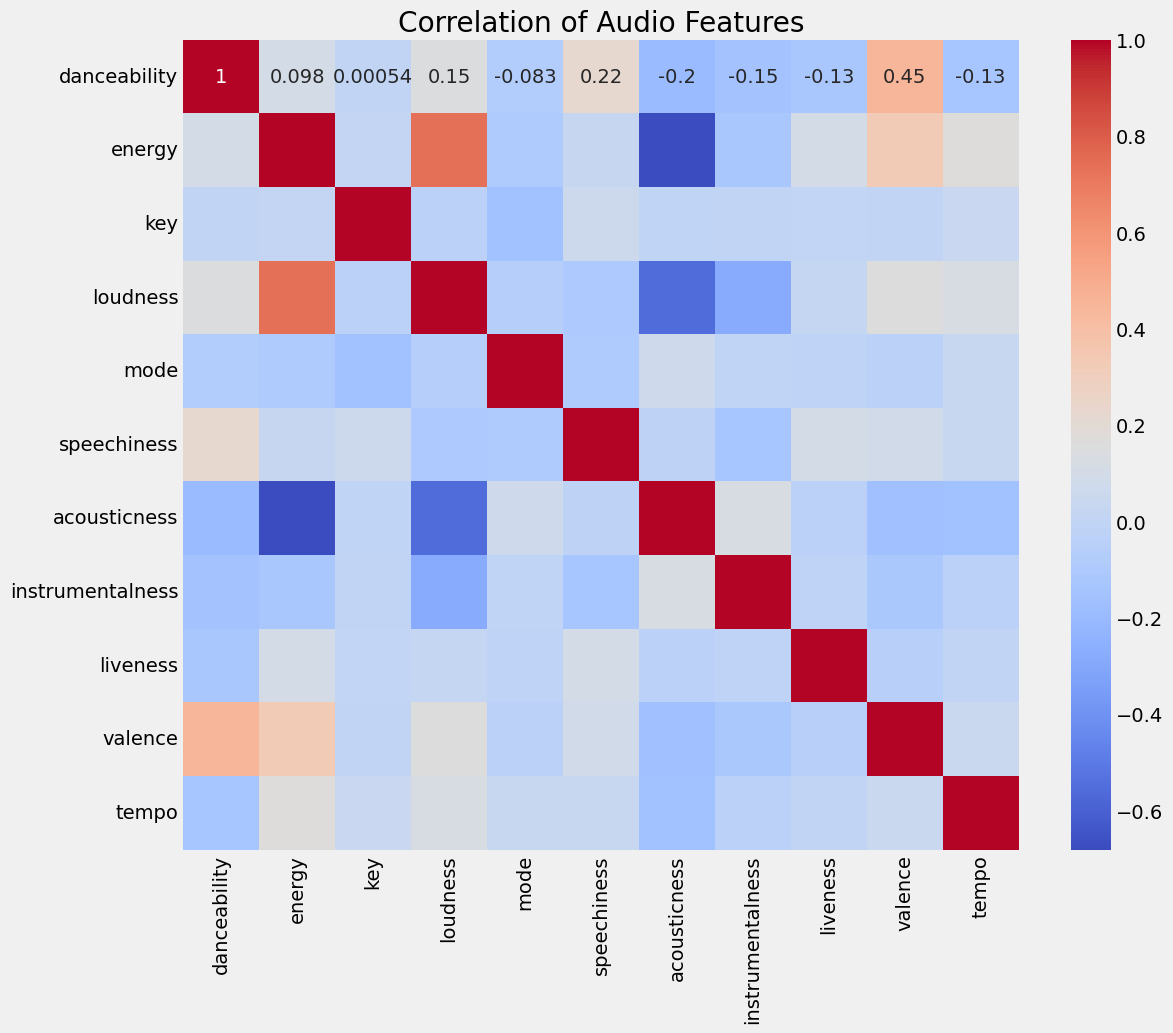

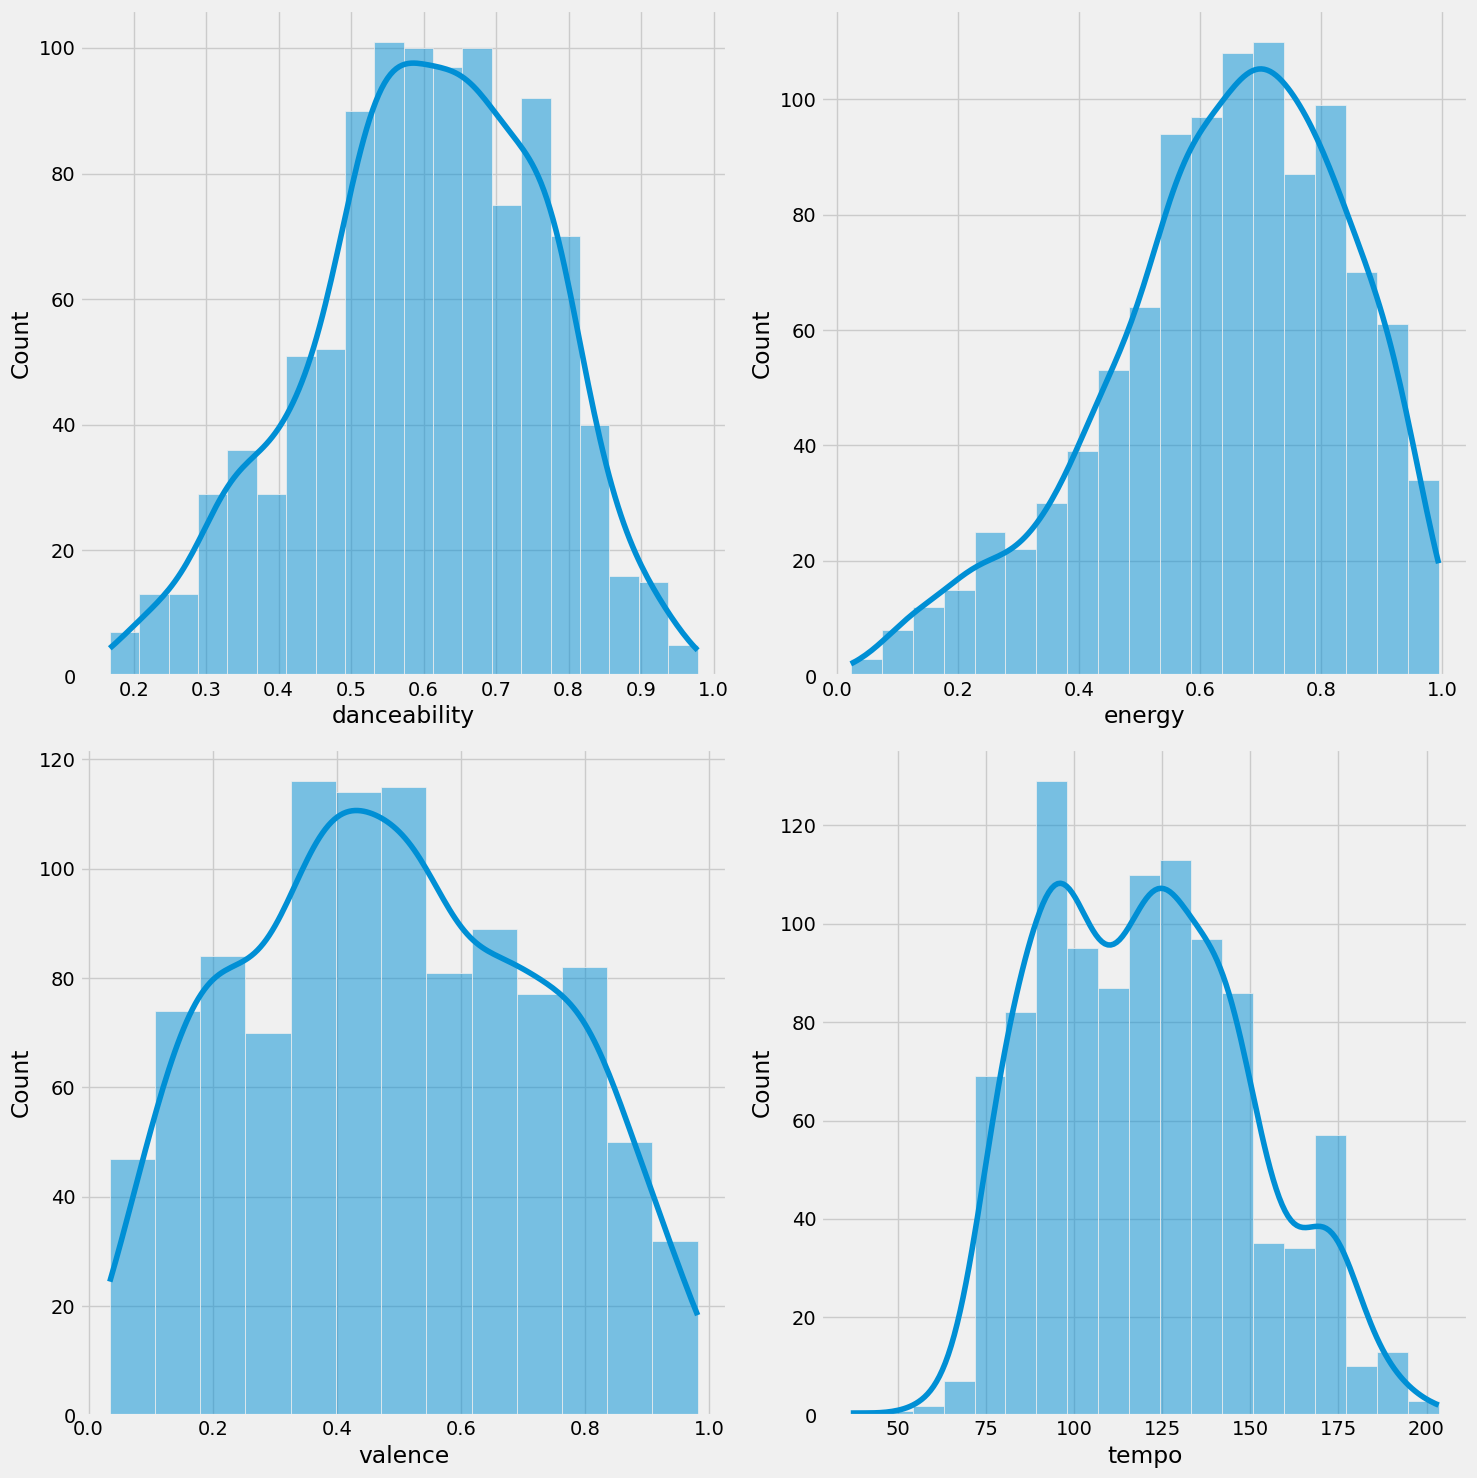

In [55]:
# Load the data
data = pd.read_csv('spotify_tracks_with_features.csv')

# Basic statistics
print(data.describe())

# Correlation matrix of audio features
corr = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation of Audio Features')
plt.show()

# Distribution of key features
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.histplot(data['danceability'], kde=True, ax=axes[0, 0])
sns.histplot(data['energy'], kde=True, ax=axes[0, 1])
sns.histplot(data['valence'], kde=True, ax=axes[1, 0])
sns.histplot(data['tempo'], kde=True, ax=axes[1, 1])
plt.tight_layout()
plt.show()

In [56]:
# Select features for clustering
features = ['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']

# Extract features
X = data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the scaled data
print(pd.DataFrame(X_scaled, columns=features).describe())

       danceability        energy           key      loudness          mode  \
count  1.031000e+03  1.031000e+03  1.031000e+03  1.031000e+03  1.031000e+03   
mean   4.617494e-16 -2.567189e-16  1.102685e-16 -2.412124e-17 -1.378356e-16   
std    1.000485e+00  1.000485e+00  1.000485e+00  1.000485e+00  1.000485e+00   
min   -2.756194e+00 -3.124682e+00 -1.401056e+00 -7.051448e+00 -1.410108e+00   
25%   -6.200295e-01 -5.814980e-01 -1.124863e+00 -3.690726e-01 -1.410108e+00   
50%    4.989194e-02  1.233980e-01 -2.009163e-02  2.091778e-01  7.091653e-01   
75%    7.419335e-01  7.550253e-01  8.084872e-01  6.342880e-01  7.091653e-01   
max    2.369337e+00  1.785841e+00  1.637066e+00  1.671959e+00  7.091653e-01   

        speechiness  acousticness  instrumentalness      liveness  \
count  1.031000e+03  1.031000e+03      1.031000e+03  1.031000e+03   
mean  -2.067535e-17 -6.891782e-18      2.756713e-17 -1.550651e-16   
std    1.000485e+00  1.000485e+00      1.000485e+00  1.000485e+00   
min   -6.710

/Users/ashtonberret/anaconda3/envs/pt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ashtonberret/anaconda3/envs/pt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ashtonberret/anaconda3/envs/pt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ashtonberret/anaconda3/envs/pt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

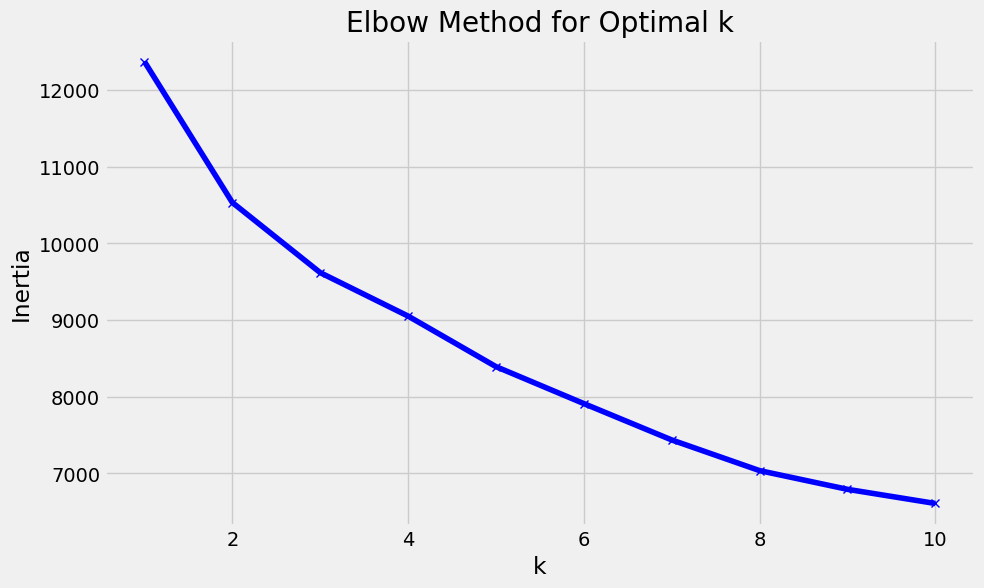

In [57]:
# Elbow method to find optimal number of clusters
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [59]:
# Perform K-means clustering
n_clusters = 4  # Adjust this based on the elbow curve but it seems around k=2 or 3 has one of the sharper descents but that leads to too few buckets
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
data['Cluster'] = cluster_labels

# Display the count of songs in each cluster
print(data['Cluster'].value_counts())

/Users/ashtonberret/anaconda3/envs/pt/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster
2    353
0    282
3    237
1    159
Name: count, dtype: int64


In [61]:
# Function to get cluster characteristics
def get_cluster_characteristics(cluster_data, features):
    return cluster_data[features].mean()

# Analyze each cluster
for i in range(n_clusters):
    cluster_data = data[data['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(f"Number of tracks: {len(cluster_data)}")
    print("\nTop 5 artists:")
    print(cluster_data['artist_name'].value_counts().head())
    print("\nAverage feature values:")
    print(get_cluster_characteristics(cluster_data, features))
    print("\n" + "="*50)




Cluster 0:
Number of tracks: 282

Top 5 artists:
artist_name
Big Sean             8
J. Cole              5
Portugal. The Man    5
Kanye West           4
Chris Brown          4
Name: count, dtype: int64

Average feature values:
danceability          0.665457
energy                0.690809
key                   6.060284
loudness             -6.634266
mode                  0.000000
speechiness           0.124039
acousticness          0.159457
instrumentalness      0.044163
liveness              0.179292
valence               0.547854
tempo               116.946379
time_signature        3.985816
dtype: float64


Cluster 1:
Number of tracks: 159

Top 5 artists:
artist_name
Oh Wonder                 4
Future                    4
Ed Sheeran                3
The Head and the Heart    2
The Beatles               2
Name: count, dtype: int64

Average feature values:
danceability          0.478616
energy                0.325058
key                   4.716981
loudness            -12.414931
mode   

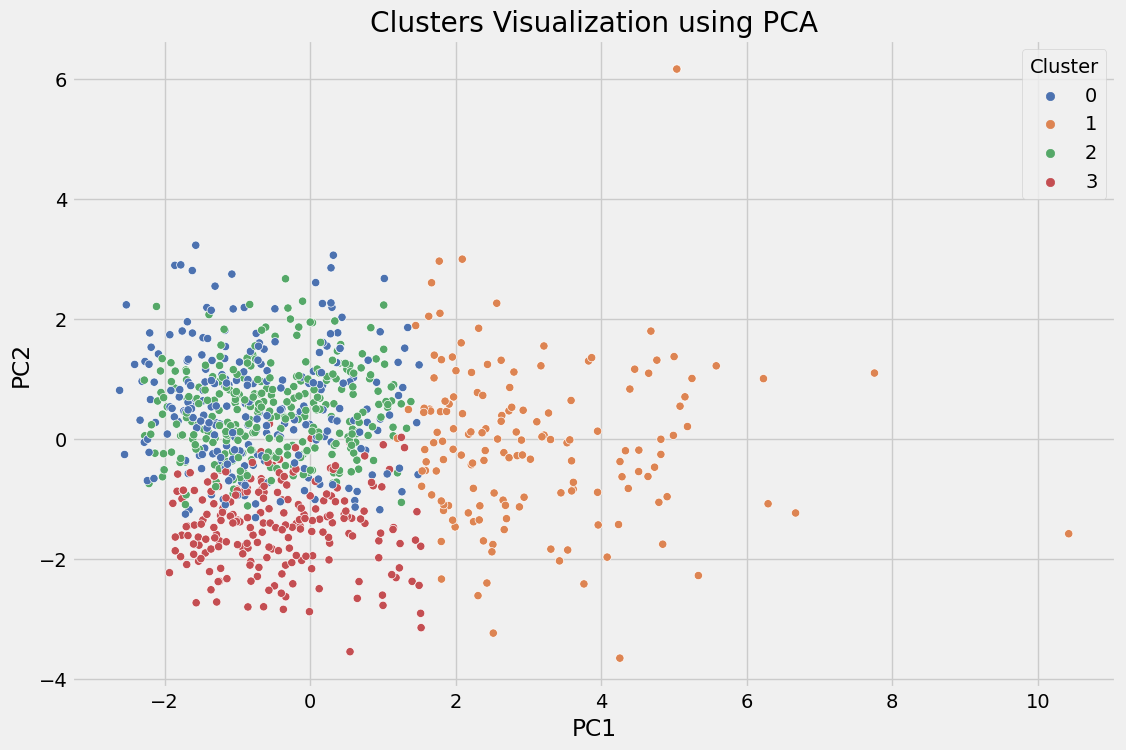

In [62]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster']

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='deep')
plt.title('Clusters Visualization using PCA')
plt.show()

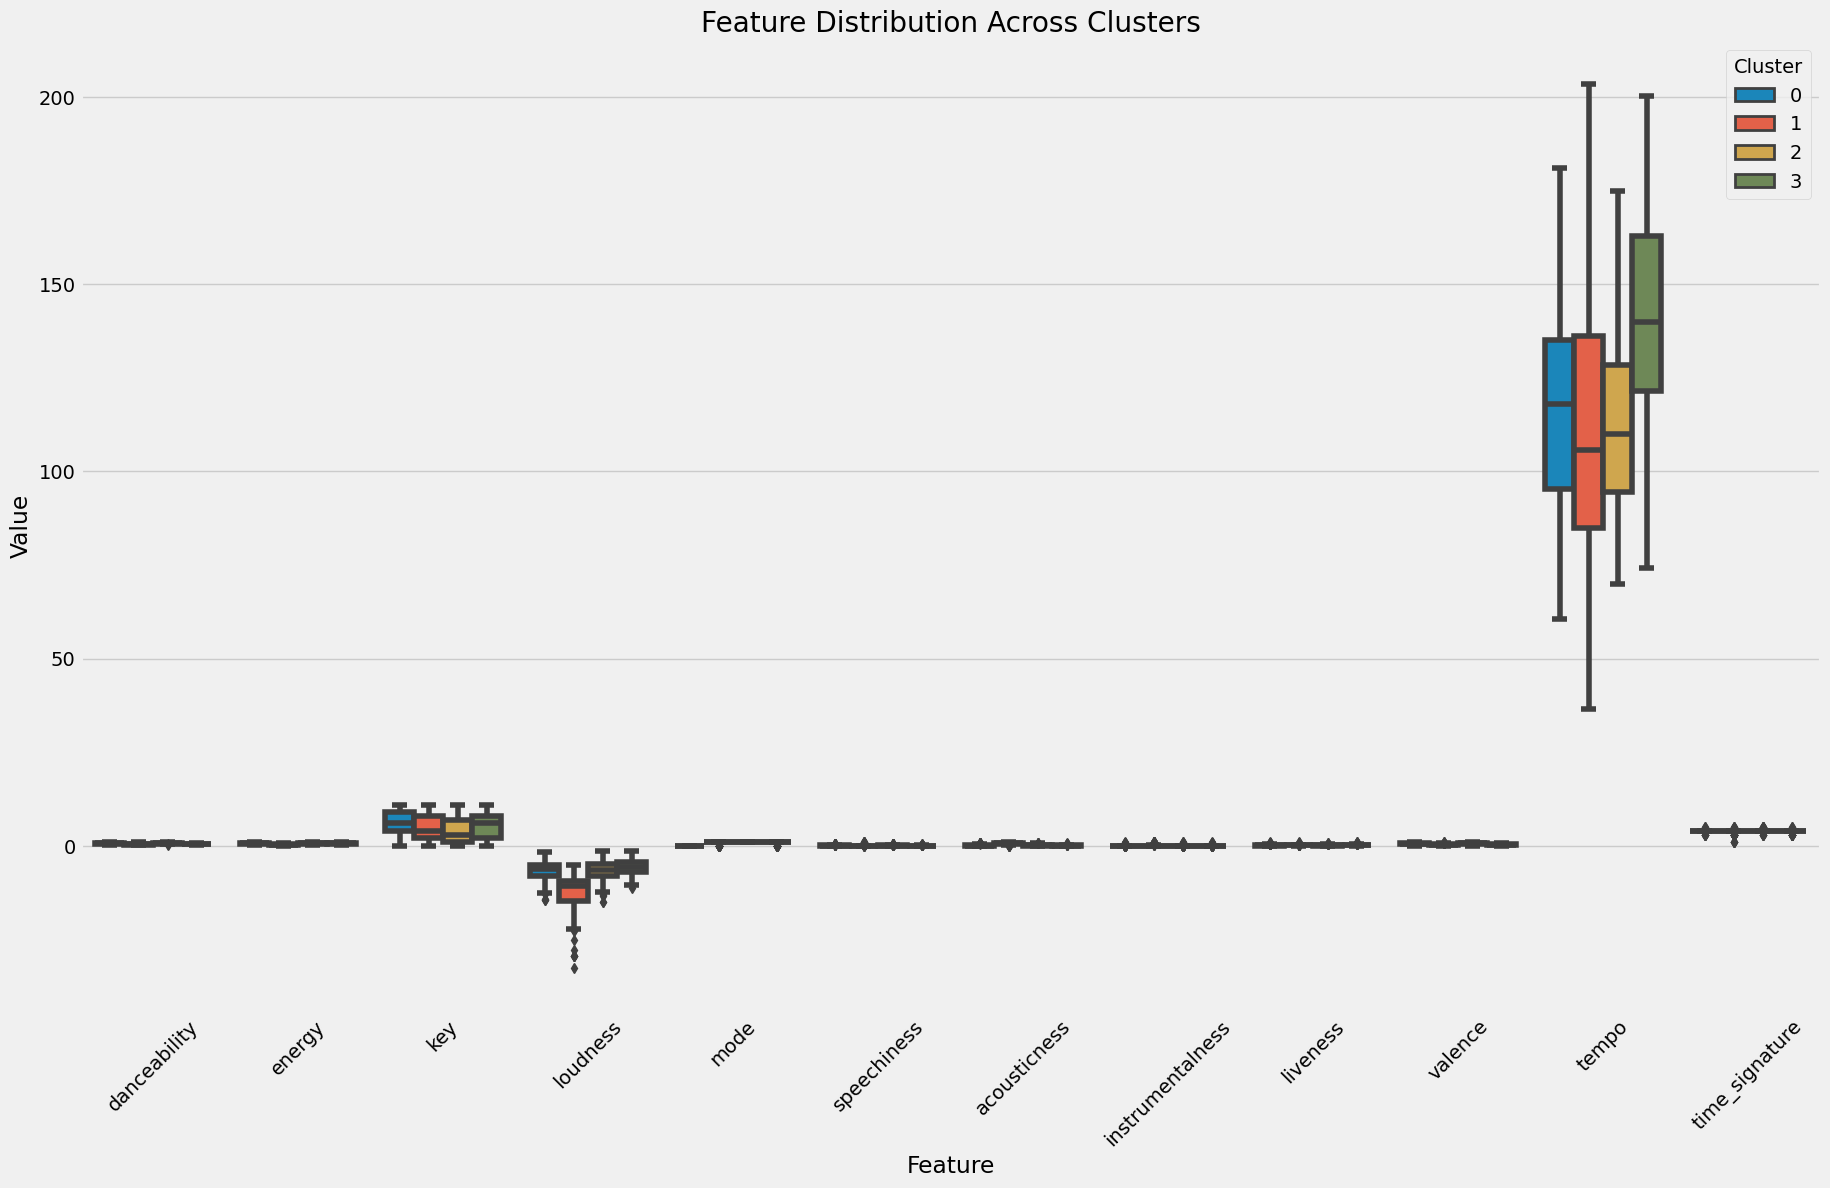

In [63]:
# Melt the DataFrame
melted_data = pd.melt(data, id_vars=['Cluster'], value_vars=features, var_name='Feature', value_name='Value')

# Create box plots
plt.figure(figsize=(20, 12))
sns.boxplot(x='Feature', y='Value', hue='Cluster', data=melted_data)
plt.xticks(rotation=45)
plt.title('Feature Distribution Across Clusters')
plt.show()